In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
CRYPTO_TARGET='NONE' 
SS_VER='SS_VER_1_1'

In [2]:
# Adapt this to your ChipWhisperer installation
%run "../Setup_Scripts/Setup_Generic.ipynb"

/home/mert/chipwhisperer/software/chipwhisperer/capture/trace/TraceWhisperer.py:31: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources # type: ignore


INFO: Found ChipWhisperer😍
scope.gain.mode                          changed from low                       to high                     
scope.gain.gain                          changed from 0                         to 30                       
scope.gain.db                            changed from 5.5                       to 24.8359375               
scope.adc.basic_mode                     changed from low                       to rising_edge              
scope.adc.samples                        changed from 24400                     to 5000                     
scope.adc.trig_count                     changed from 23974254                  to 34512336                 
scope.clock.adc_src                      changed from clkgen_x1                 to clkgen_x4                
scope.clock.adc_freq                     changed from 18776218                  to 29538459                 
scope.clock.adc_rate                     changed from 18776218.0                to 29538459.0        

In [20]:
GADGET = "BA"  # possible values are ["AB", "BA", "AND", "ADD", "ZERO"]
ARCH = 'asm' # possible values are ["c", "asm", "naive_asm"]

if ARCH == 'asm':
    samples = {"AB": 1200, "BA": 400, "AND": 900, "ADD": 1100, "ZERO": 1200}
elif ARCH == 'naive_asm':
    samples = {"AB": 600, "BA": 300, "AND": 300, "ADD": 700, "ZERO": 600}
elif ARCH == 'c':
    samples = {"AB": 500, "BA": 200, "AND": 300, "ADD": 500, "ZERO": 500}

randomness = {"AB":2, "BA": 2, "AND": 2, "ADD": 6, "ZERO": 18}
RAND = randomness[GADGET]
scope.adc.samples = samples[GADGET]

In [21]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER" "$GADGET" "$ARCH" "$RAND"
cd target
make clean PLATFORM=$1 CRYPTO_TARGET=$2 SS_VER=$3 -j
make PLATFORM=$1 CRYPTO_TARGET=$2 SS_VER=$3 GADGET=$4 ARCH=$5 RAND=$6 -j

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
rm -f -- secBA-CW308_CC2538.hex secBA-CW301_AVR.hex secBA-CW303.hex secBA-CW304.hex secBA-CW308_MEGARF.hex secBA-CW308_SAM4L.hex secBA-CW308_STM32F0.hex secBA-CW308_STM32F1.hex secBA-CW308_STM32F2.hex secBA-CW308_STM32F3.hex secBA-CW308_STM32F4.hex secBA-CW308_K24F.hex secBA-CW308_NRF52.hex secBA-CW308_AURIX.hex secBA-CW308_SAML11.hex secBA-CW308_EFM32TG11B.hex secBA-CWLITEARM.hex secBA-CWLITEXMEGA.hex secBA-CWNANO.hex secBA-CWHUSKY.hex secBA-CW308_K82F.hex secBA-CW308_PSOC62.hex secBA-CW308_IMXRT1062.hex secBA-CW308_FE310.hex secBA-CW308_EFR32MG21A.hex secBA-CW308_EFM32GG11.hex secBA-CW308_STM32L5.hex secBA-CW308_NEORV32.hex secBA-CW312_SAM4S.hex secBA-CW305_IBEX.hex
.
rm -rf .dep
Cleaning project:
rm -f -- secBA-CW308_CC2538.eep secBA-CW301_AVR.eep secBA-CW303.eep secBA-CW304.eep secBA-CW308_MEGARF.eep secBA-CW308_SAM4L.eep secBA-CW308_STM32F0.eep secBA-CW308_STM32F1.eep secBA-CW308_STM32F2.eep secBA-CW308_STM32F3.eep secBA-CW308_STM3

In file included from basics.c:1:
basics.h:6: warning: "ASM" redefined
    6 | #define ASM
      | 
<command-line>: note: this is the location of the previous definition
basics.c: In function 'sec_mul_u16':
basics.c:345:5: warning: implicit declaration of function 'asm_sec_mul_u16'; did you mean 'asm_sec_add_u16'? [-Wimplicit-function-declaration]
  345 |     asm_sec_mul_u16(z, x, y, pool);
      |     ^~~~~~~~~~~~~~~
      |     asm_sec_add_u16
asm_gadgets.S: Assembler messages:
asm_gadgets.S:839: Warning: ignoring redefinition of register alias 'pool'
asm_gadgets.S:840: Warning: ignoring redefinition of register alias 't1'
asm_gadgets.S:845: Warning: ignoring redefinition of register alias 't2'
utils.c: In function 'print_bool_masked_u64':
utils.c:201:15: warning: format '%lX' expects argument of type 'long unsigned int', but argument 2 has type 'uint64_t' {aka 'long long unsigned int'} [-Wformat=]
  201 |     printf("%lX ", x[i]);
      |             ~~^    ~~~~
      |             

-e Done!
-e Done!
-e Done!


project.c: In function 'get_pt':
project.c:661:5: warning: implicit declaration of function 'secBA_m4' [-Wimplicit-function-declaration]
  661 |     secBA_m4(zp, xp, up);
      |     ^~~~~~~~


-e Done!
-e Done!
-e Done!
-e Done!
-e Done!
.
LINKING:
-en     secBA-CWLITEARM.elf ...
Memory region         Used Size  Region Size  %age Used
             RAM:        1704 B        40 KB      4.16%
             ROM:       10740 B       256 KB      4.10%
-e Done!
.
.
.
Creating load file for Flash: secBA-CWLITEARM.hex
Creating load file for Flash: secBA-CWLITEARM.bin
arm-none-eabi-objcopy -O ihex -R .eeprom -R .fuse -R .lock -R .signature secBA-CWLITEARM.elf secBA-CWLITEARM.hex
.
arm-none-eabi-objcopy -O binary -R .eeprom -R .fuse -R .lock -R .signature secBA-CWLITEARM.elf secBA-CWLITEARM.bin
Creating load file for EEPROM: secBA-CWLITEARM.eep
arm-none-eabi-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
--change-section-lma .eeprom=0 --no-change-warnings -O ihex secBA-CWLITEARM.elf secBA-CWLITEARM.eep || exit 0
Creating Extended Listing: secBA-CWLITEARM.lss
arm-none-eabi-objdump -h -S -z secBA-CWLITEARM.elf > secBA-CWLITEARM.lss
.
Creating Symbol Table: secBA-CWLITEARM.s

In [22]:
cw.program_target(scope, prog, "target/secBA-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 10739 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 10739 bytes


In [23]:
from random import randint
from tqdm.notebook import trange
from secrets import randbits
import numpy as np

def get_traces(N):
    traces_1 = []
    traces_2 = []
    x = []
    FIXED = 15
    
    for i in trange(N, desc='Capturing traces'):
        scope.arm()

        mask = randbits(32)
        x0 = FIXED ^ mask
        x1 = mask

        x0_0 = x0 % (2**8)
        x0_1 = (x0 % (2**16)) >> 8
        x0_2 = (x0 % (2**24)) >> 16
        x0_3 = x0 >> 24

        x1_0 = x1 % (2**8)
        x1_1 = (x1 % (2**16)) >> 8
        x1_2 = (x1 % (2**24)) >> 16
        x1_3 = x1 >> 24
        
        fixed_text = bytearray([x0_0, x0_1, x0_2, x0_3, x1_0, x1_1, x1_2, x1_3])
        
        randomness = bytearray([randbits(8), randbits(8), randbits(8), randbits(8)])
        fixed_text.extend(randomness)
            
        if randbits(1):
            val = FIXED

            target.simpleserial_write('p', fixed_text)
             
            ret = scope.capture()
            t = scope.adc.trig_count
            #print(t)
            if ret:
                print("Target timed out!")
            response = target.simpleserial_read('r', 4)
            traces_1.append(scope.get_last_trace())
        else:
            text = bytearray([randbits(8) for _ in range(len(fixed_text))])

            rnd_x0 = (text[3] << 24) |(text[2] << 16) | (text[1] << 8) | text[0]
            rnd_x1 = (text[7] << 24) |(text[6] << 16) | (text[5] << 8) | text[4]
            
            val = rnd_x0 ^ rnd_x1
    
            target.simpleserial_write('p', text)
            ret = scope.capture()
            if ret:
                print("Target timed out!")
            response = target.simpleserial_read('r', 4)
            traces_2.append(scope.get_last_trace())
 
        if VERBOSE:
            print(val == (int(response[3])<<24) + (int(response[2])<<16) + (int(response[1])<<8) + int(response[0]))
            
    size = min(len(traces_1), len(traces_2))
    
    print("Trigger up for", t, "ADC cycles")
    return (traces_1[:size], traces_2[:size], x)

In [24]:
ch = 0
if ch == 0:
    VERBOSE = False
    nb_traces = 100000
    traces_1, traces_2, x = get_traces(nb_traces)
    #traces_1_arr = np.array(traces_1)
    #traces_2_arr = np.array(traces_2)
    #np.save('traces_1.npy', traces_1_arr)
    #np.save('traces_2.npy', traces_2_arr)
elif ch == 1:
    VERBOSE = True
    nb_traces = 100
    traces_1, traces_2, x = get_traces(nb_traces)
else:    
    traces_1 = np.load('traces_1.npy')
    traces_2 = np.load('traces_2.npy')

Capturing traces:   0%|          | 0/100000 [00:00<?, ?it/s]

Trigger up for 380 ADC cycles


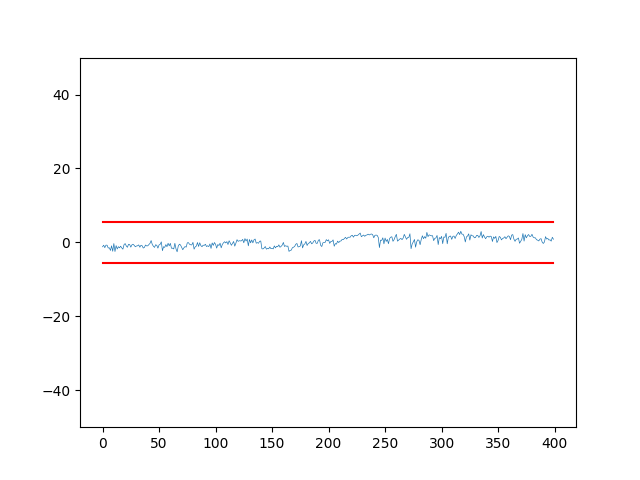

In [26]:
%matplotlib ipympl
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from scipy.stats import norm

alpha = 10**(-5) # error rate
sigma = 1 - (1 - alpha)**(1/samples[GADGET])
th = norm.ppf(1 - sigma/2) # we adapt the threshold depending on number of samples

t_val = ttest_ind(traces_1, traces_2, axis=0, equal_var=False)[0]
plt.close()
plt.plot(t_val[0:], linewidth=0.5)
plt.plot([th]*scope.adc.samples, color = 'r')
plt.plot([-th]*scope.adc.samples, color = 'r')
plt.ylim(-50, 50)
plt.show()

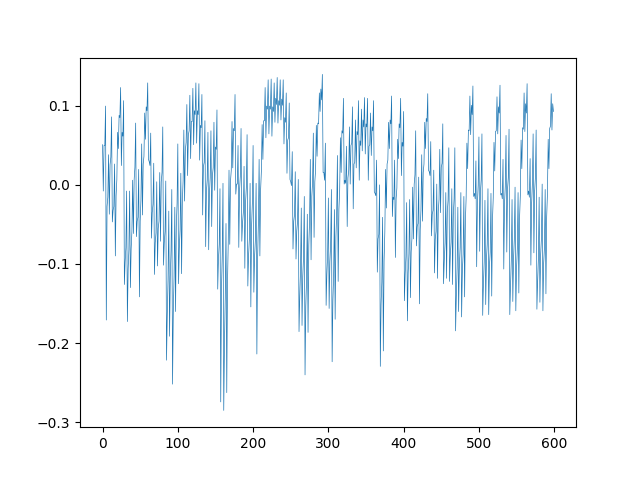

In [19]:
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.close()
for t in traces_1[:1]:
    plt.plot(t[:], linewidth=0.5)
plt.show()

In [19]:
import numpy as np
np.save("t-test-{}-{}-{}.npy".format(str(nb_traces), GADGET, ARCH), t_val)

In [28]:
target.dis()
scope.dis()

(ChipWhisperer Scope ERROR|File naeusbchip.py:113) Scope already disconnected!


True